In [1]:
#Where's  your data??
# path_to_nmr_data='data/HETs_15N.txt'  #Data stored locally
path_to_nmr_data='https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt' #Github raw link
# path_to_nmr_data='https://drive.google.com/file/d/1w_0cR6ykjL7xvdxU2W90fRXvZ8XfLFc3/view?usp=share_link' #Google drive share link

# How many detectors
n=4

#Is there a PDB ID or saved topology file associated with your structure? 
#(set =None if no structure)
topo='2KJ3'

#What Nucleus did you measure? (see below for more explanation)
Nuc='N'  #This refers to the backbone nitrogen, specifically
segids='B' # The example data (HETs) has 3 copies of the molecule, so we need to specify this
# You will probably want to set segids=None

In [2]:
# SETUP pyDR
import os
os.chdir('../..')

In [3]:
#Imports
import pyDR

In [4]:
data=pyDR.IO.readNMR(path_to_nmr_data)

In [5]:
proj=pyDR.Project(directory=None)    #Include a directory to save the project
proj.append_data(data)

In [6]:
if topo is not None and Nuc is not None:
    data.select=pyDR.MolSelect(topo=topo)
    data.select.select_bond(Nuc=Nuc,resids=data.label,segids=segids)

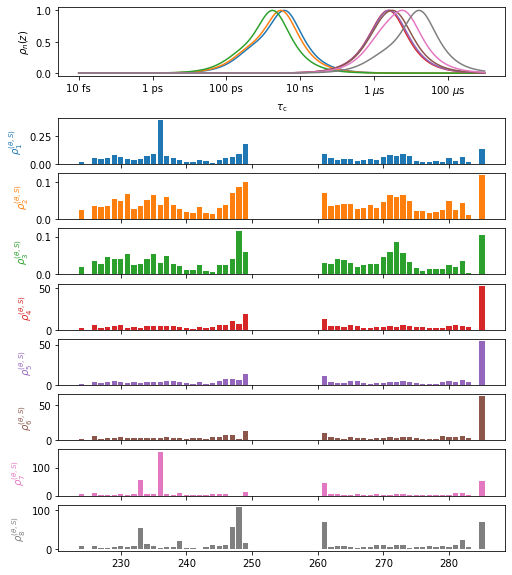

In [7]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

In [8]:
data.detect.r_auto(n)    #Set number of detectors here
if data.S2 is not None:
    data.detect.inclS2() #Include order parameters

fit=data.fit()  #Fit the data

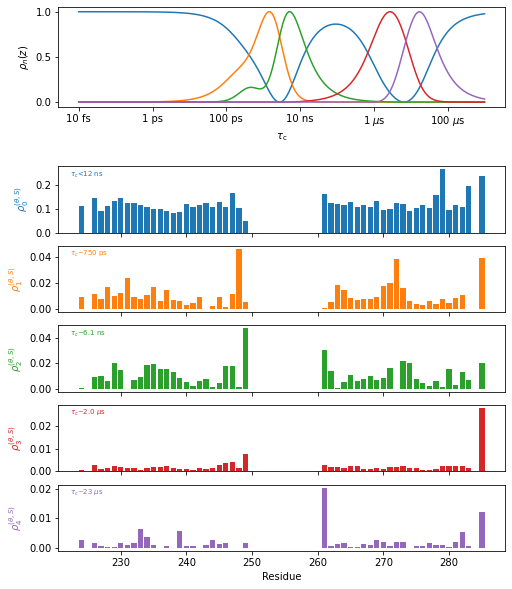

In [9]:
proj.close_fig('all')
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

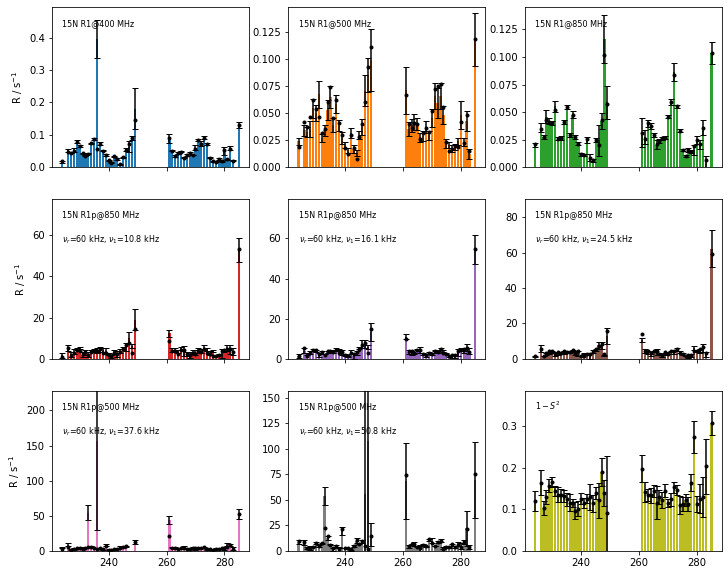

In [10]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

In [11]:
fit.nglview(1)

NGLWidget(max_frame=19)

In [12]:
fit.chimera()